<a href="https://colab.research.google.com/github/fgassuncao/MO412/blob/main/assignment_8./assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fábio Gomes de Assunção 233664
### Assignment 5 - Barabasi-Albert Model
##### (Obs.1: The questions were answered by 4 notes: note 1 to note 4 throght the document, make sure to read then!)


##Imports

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import collections 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # Lib to fit the power law curve

## Creating the Graphs

In [2]:
# Constant of edges for each new node
m = 4

# Make a barashi graph with a full conected original graph (N=4)
G1 = nx.complete_graph(4)

# Creating new BA networks from previous ones.
# Seed ensures the same ploting for every test
G2 = nx.barabasi_albert_graph(10**2, m, initial_graph=G1, seed=2022)
G3 = nx.barabasi_albert_graph(10**3, m, initial_graph=G2, seed=2022)
G4 = nx.barabasi_albert_graph(10**4, m, initial_graph=G3, seed=2022)

## Degree Distribution

In [3]:
def degreDistribution(G):
    degrees = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = collections.Counter(degrees) # Count how many times each degree apears

    listUniDegrees = np.unique(degrees) # List with unique degree

    listProbDegree = [] # List with probability of each degree

    for deg_dist in dict_deg_distribution: # Loop to get the degree distribution
        listProbDegree.append(dict_deg_distribution[deg_dist]/len(degrees))
        
    return listUniDegrees, degrees, listProbDegree

In [4]:
def degreeCumulative(G):
    listUniDegrees, degrees, listProbDegree = degreDistribution(G)
    
    dict_cumulative_degree = {} # Dict with how many nodes are degree equal or bigest that

    for deg in listUniDegrees:
        dict_cumulative_degree[deg] = np.count_nonzero(deg <= degrees)

    listCumulativeProb = list(map(lambda x: (x[1]/len(degrees)), dict_cumulative_degree.items()))
    
    return listCumulativeProb, listUniDegrees, listProbDegree

In [5]:
def plotDegreeProbability(G):
    deg = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
    dict_deg_distribution = collections.Counter(deg) # Count how many times each degree apears
    
    listProbDegree = [] # List with probability of each degree
    for deg_dist in dict_deg_distribution:
        listProbDegree.append(dict_deg_distribution[deg_dist]/len(deg))
    
    # Ploting the distribution
    plt.bar(list(dict_deg_distribution.keys()), listProbDegree, 0.35)
    plt.title('Degree probability distribution of the graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    
    return listProbDegree

In [6]:
graphsCumulatives = [] # Contains the cumulative values of all graphs 
graphsDegrees = [] # Contains the degree values of all graphs
graphsProbDegree = [] # Contains the <pk> values of all graphs
    
for graph in [G2, G3, G4]: # Look to each graph and extract their info

    listCumulativeProb, listUniDegrees, listProbDegree = degreeCumulative(graph)
    graphsCumulatives.append(listCumulativeProb)
    graphsDegrees.append(listUniDegrees)
    graphsProbDegree.append(listProbDegree)

### Ploting the Degree Distribution

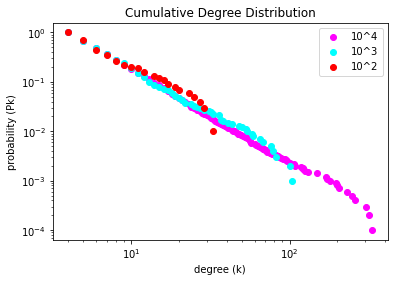

In [7]:
plt.scatter(graphsDegrees[2], graphsCumulatives[2], label='10^4',color="magenta")
plt.scatter(graphsDegrees[1], graphsCumulatives[1], label='10^3',color="cyan")
plt.scatter(graphsDegrees[0], graphsCumulatives[0], label='10^2',color="red")

plt.xscale("log")
plt.yscale("log")
plt.title('Cumulative Degree Distribution')
plt.xlabel('degree (k)')
plt.ylabel('probability (Pk)')

plt.legend()

## **NOTE 1:** We can note the Scale-Free behavior, because the degree distribution shows a long tail ploted.

## Degree distribution following a Power law guide line

In [8]:
# Calculates de power law
def power_law(x, a, b):
    # a = unique degrees
    # b = propbability of N have at least degree a
    return a * np.power(x, -b)

In [9]:
# Calculates the regression to power law distribution for each Barabasi Graph
# Remembering, _ ignores the second parameter
# curve_fit returns the coverance matrix to simulate the power law line to the graphs
popt2, _ = curve_fit(power_law, graphsDegrees[0], graphsCumulatives[0])
popt3, _ = curve_fit(power_law, graphsDegrees[1], graphsCumulatives[1])
popt4, _ = curve_fit(power_law, graphsDegrees[2], graphsCumulatives[2])

all_popt = [popt2, popt3, popt4]

In [10]:
def plotCumulativePlots(axs, N, Ns, pK, popt, color):
    axs.scatter(N, pK, label=Ns, color=color)
    axs.loglog(N, power_law(N, * popt), color)
    axs.set_title(f'N = {Ns}')
    axs.set_xscale('log')
    axs.set_yscale('log')
    axs.set_xlabel('log(k)')
    axs.set_ylabel('log(Pk)')


## **NOTE 2:**  Read the prints bellow

The max degree of netwokm N = 100 is 33
The Power Law regression for the degree 33 at Netowrk = 100 = -3.697836451958278

The max degree of netwokm N = 1000 is 103
The Power Law regression for the degree 103 at Netowrk = 1000 = -6.01057977545165

The max degree of netwokm N = 10000 is 333
The Power Law regression for the degree 333 at Netowrk = 10000 = -8.265172334407042



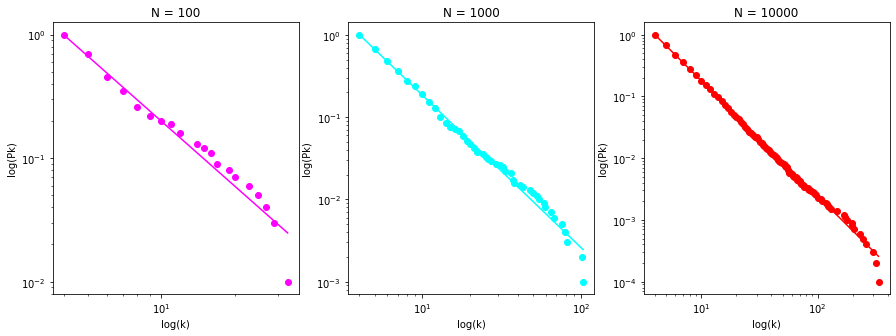

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

Ns = [10**2, 10**3, 10**4]
colors = ['magenta', 'cyan', 'red']
axs = [ax1, ax2, ax3]
listsPopt2 = [popt2, popt3, popt4]

for N in range(len(graphsDegrees)):
    print(f"The max degree of netwokm N = {Ns[N]} is {max(graphsDegrees[N])}")
    plotCumulativePlots(axs[N], graphsDegrees[N], Ns[N], graphsCumulatives[N], all_popt[N], colors[N])
    print(f"The Power Law regression for the degree {max(graphsDegrees[N])} at Netowrk = {Ns[N]} = {np.log(power_law(max(graphsDegrees[N]), *listsPopt2[N]))}\n")
    #print(f'The Power Law regression for the degree {max(graphsDegrees[N])}: \n N=10^2 = {np.log(power_law(max(graphsDegrees[N]), *popt2))} \n N=10^3 = {np.log(power_law(max(graphsDegrees[N]), *popt3))} \n N=10^4 = {np.log(power_law(max(graphsDegrees[N]), *popt4))} \n')


## **NOTE 3:** As $p<k>$ is similar when comparing the tree networks, where they follow the lines, we notice the Power-Law regression. Also, as they were build by using Barabási-Albert Model, their growth is constant (m defines how much links a new node has). Read the print bellow for complement info:

In [12]:
print(f'For instance, in graph N = {Ns[0]}, where degree {min(graphsDegrees[0])}, <pK>  = {np.log( min(graphsCumulatives[0]))} and '+
      f'regression = {np.log(power_law(max(graphsDegrees[0]), *popt2))}. Theye are close!')

For instance, in graph N = 100, where degree 4, <pK>  = -4.605170185988091 and regression = -3.697836451958278. Theye are close!


## At last, for comparison, a single plot contaning all others

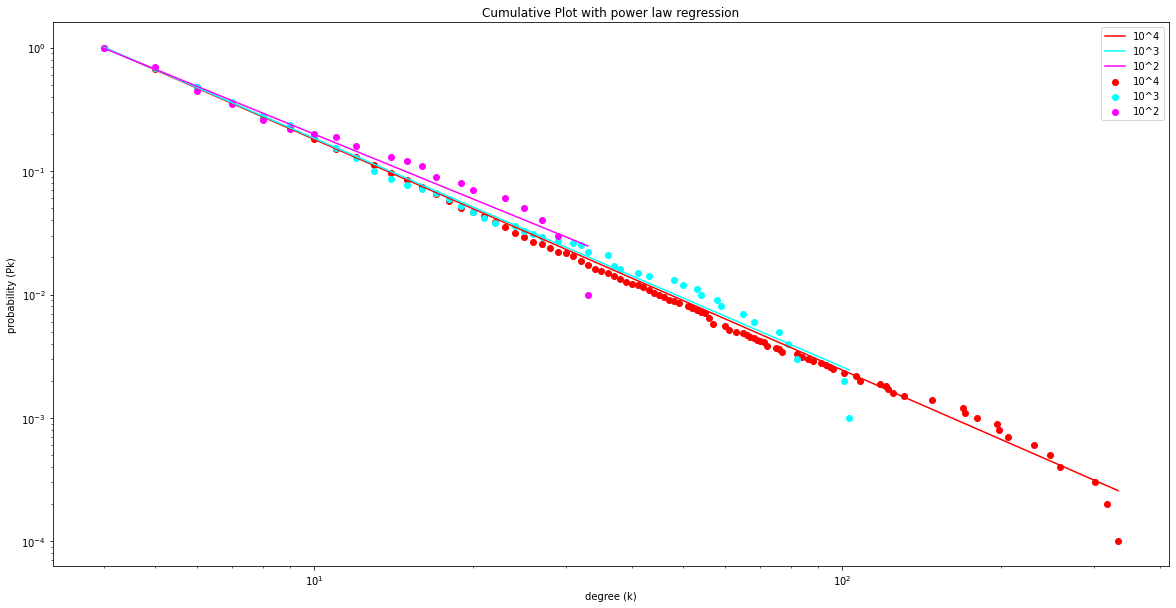

In [13]:
# Plotting the degree distribution
plt.figure(figsize=(20, 10))
plt.scatter(graphsDegrees[2], graphsCumulatives[2], label='10^4',color=colors[2])
plt.scatter(graphsDegrees[1], graphsCumulatives[1], label='10^3',color=colors[1])
plt.scatter(graphsDegrees[0], graphsCumulatives[0], label='10^2',color=colors[0])

# Plotting the regression line (all together)
plt.loglog(graphsDegrees[2], power_law(graphsDegrees[2], *popt4), label='10^4', color=colors[2])
plt.loglog(graphsDegrees[1], power_law(graphsDegrees[1], *popt3), label='10^3', color=colors[1])
plt.loglog(graphsDegrees[0], power_law(graphsDegrees[0], *popt2), label='10^2', color=colors[0])

plt.xscale("log")
plt.yscale("log")
plt.title('Cumulative Plot with power law regression')
plt.xlabel('degree (k)')
plt.ylabel('probability (Pk)')

plt.legend()
plt.show()

## **NOTE 4:** By using the last graphich, as N gets bigger, all regretions converges to the same point